<a href="https://colab.research.google.com/github/Rajeeb321123/Deep-learning-tensorFlow-Journey/blob/master/10_time_series_forecasting_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict🤑💰📈

To predict the price of Bitcoin based on historical price of Bitcoin.

Links:
* https://github.com/mrdbourke/tensorflow-deep-learning
* Book version: https://dev.mrdbourke.com/tensorflow-deep-learning/
* About Time series: https://otexts.com/fpp3/

## Get Data


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-09-22 08:38:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2024-09-22 08:38:13 (14.0 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing Time series with pandas

In [ ]:
# import with pandas
import pandas as pd
# Let's read in our bitcoin data and parse the data
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"]) # parse the date column and tell pandas column 1 is a date time.
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
# How many samples we have?
len(df)

2787

Though we've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually likes lots and lots of samples ( thousands to tens of thousands  to millions ).

A smaller number of samples is something you'll often run into with time serises of data problems.

> 🔑 **Note** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has seasonality of daily or value of 365 because we collect one sample per day meaning we will get 365 per year.

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


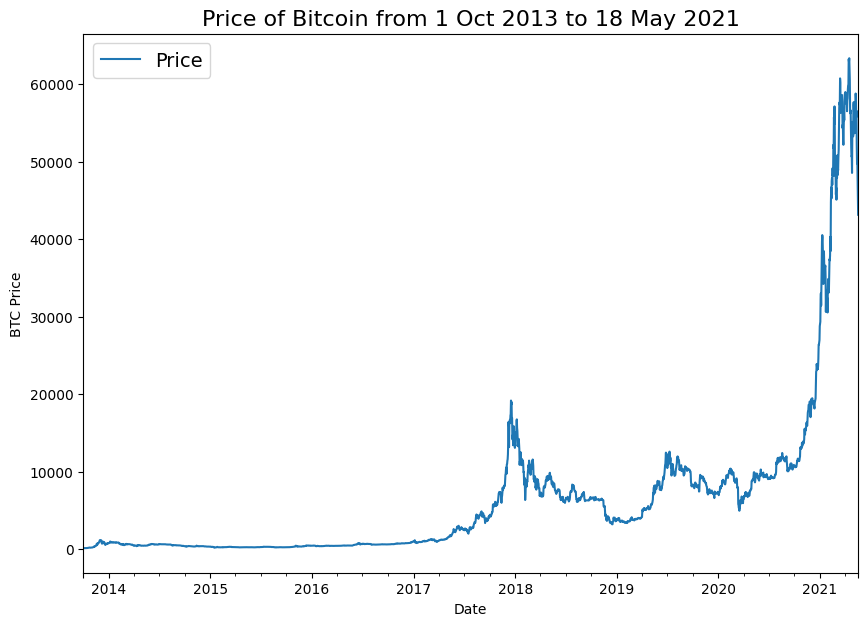

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.legend(fontsize=14, loc='upper left')

## Import time series data with Python's CSV module

In [ ]:
# # importing and formating historical Bitcoin data with Python
# import csv
# from datetime import datetime

# with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', mode='r') as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     print(type(csv_reader)) # delimiter what comes between the column. see the csv file in raw to see comma
#     line_count = 0

#     for row in csv_reader:
#       if line_count == 0:
#           print(f'Column are {", ".join(row[:3])}')
#           line_count += 1
#       else:
#           print(f'\t{row[0]} value in {row[1]} was {row[2]}.')
#           line_count += 1
#       if line_count > 10:
#         break

#     print(f'Processed {line_count} lines.')

In [ ]:
# Importing and formating historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', mode='r') as f:
  csv_reader = csv.reader(f, delimiter=',')  # delimiter what comes between the column. see the csv file in raw to see comma
  next(csv_reader) # skip the top row. We dont want the header

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # time is in index 1
    btc_price.append(float(line[2])) # Get closing price as fload

# View first 10 of each
timesteps[:10],btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin from 1 Oct 2013 to 18 May 2021')

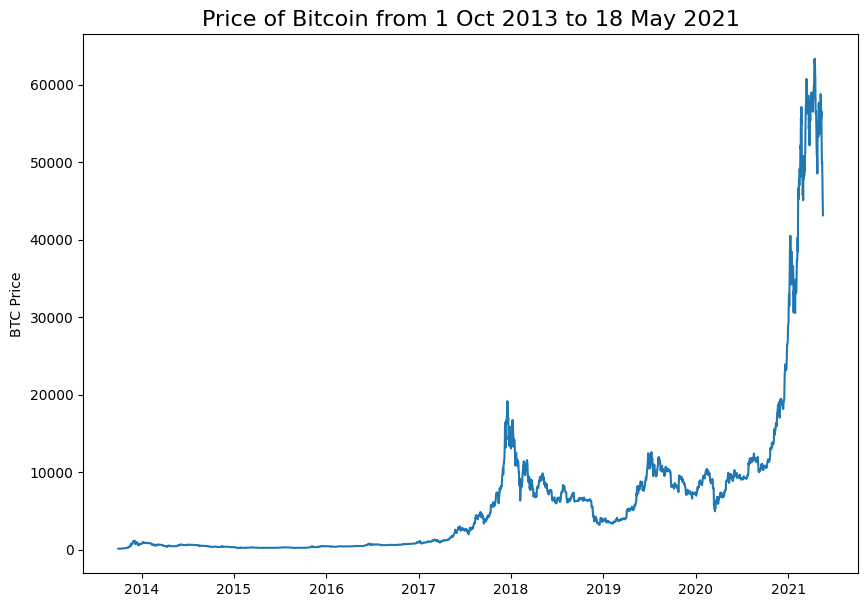

In [ ]:
# Plot from csv
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
# plt.legend(fontsize=14, loc='upper left') no legend in python csv

## Format data part 1: Create train and test sets of our time series data

### Creating train and test set with time series data (wrong way)

In [ ]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    # random split is wrong for time series problem
                                                    random_state=42, # split the data randomly
                                                    )

X_train[:10], y_train[:10]

(array(['2015-05-23T00:00:00.000000000', '2017-11-27T00:00:00.000000000',
        '2019-06-01T00:00:00.000000000', '2014-01-09T00:00:00.000000000',
        '2014-08-12T00:00:00.000000000', '2019-11-26T00:00:00.000000000',
        '2015-11-28T00:00:00.000000000', '2015-12-27T00:00:00.000000000',
        '2018-04-10T00:00:00.000000000', '2014-06-19T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([ 240.1588    , 9573.9675    , 8513.20388193,  860.84166   ,
         566.31625   , 7211.86180875,  354.954     ,  419.338     ,
        6789.2675    ,  601.88666   ]))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

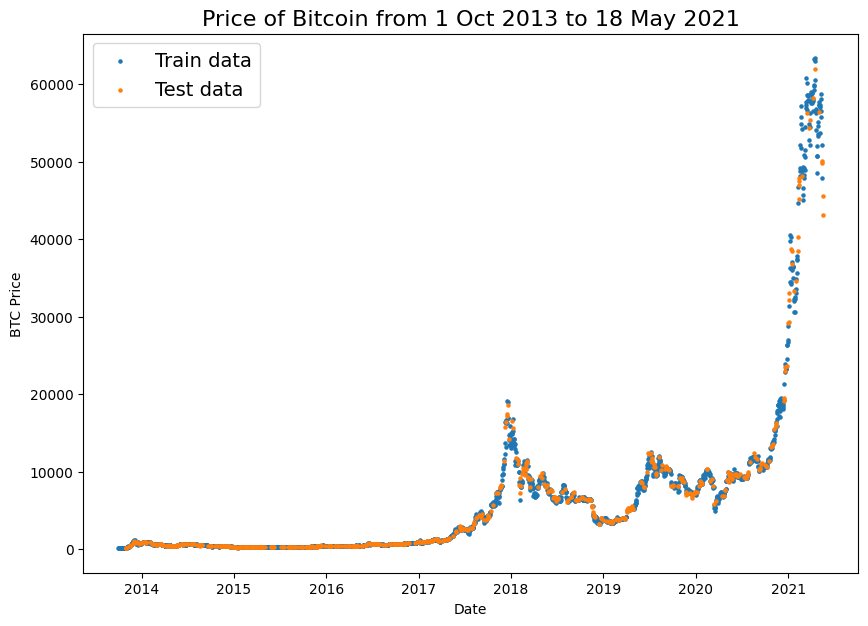

In [ ]:
# Let's plot wrong train and test split data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.legend(fontsize=14, loc='upper left')
plt.show()

# data leakage issue
# test data should simulate future in time series (psuedo future)

### Create train and test sets for time series (right way)

In [ ]:
# Create a train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train and 20% test

# Create train data splits (everyting before the splits)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test splits (everyting beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

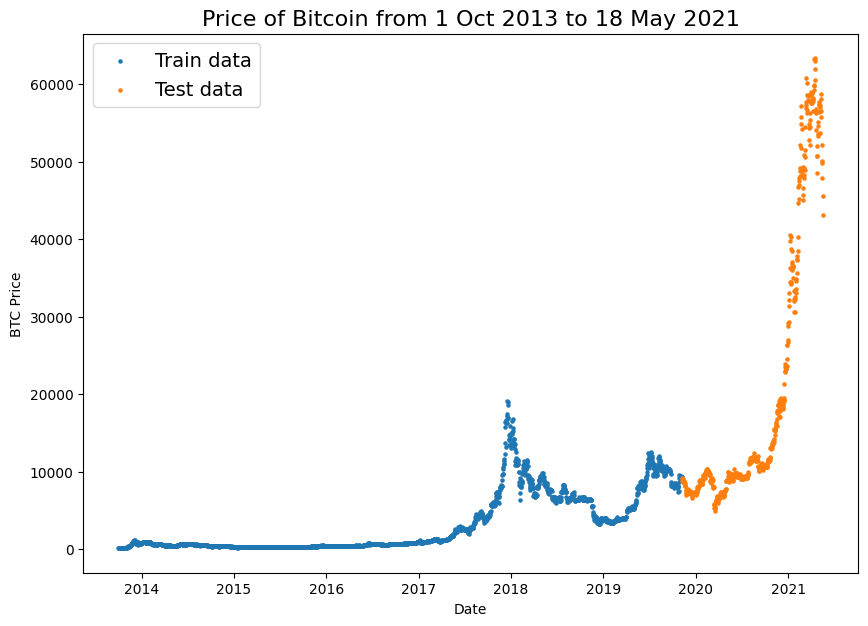

In [ ]:
# Plot the correctly made splts
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.legend(fontsize=14, loc='upper left')
plt.show()

# test data is simulating futre (right way)

## Create a plotting functions

Typing plotting code is tedious, let's functionize it

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format = ".", start = 0, end=None, label = None):
  """
  Plot timesteps (a series of points in time) against values (a series of values across timesteps)

  Parameters
  ----------
  timesteps: array of timesteps values
  values: array of values across time
  format: style of plot, default is "."
  start: where to start the plot (setting a value will index from start of timesteps)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about the values
  """
  # Plot the series
  plt.plot(timesteps[start:end],
           values[start:end],
           format,
           label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")

  if label:
    plt.legend(fontsize = 14) # label bigger

  plt.grid(True)

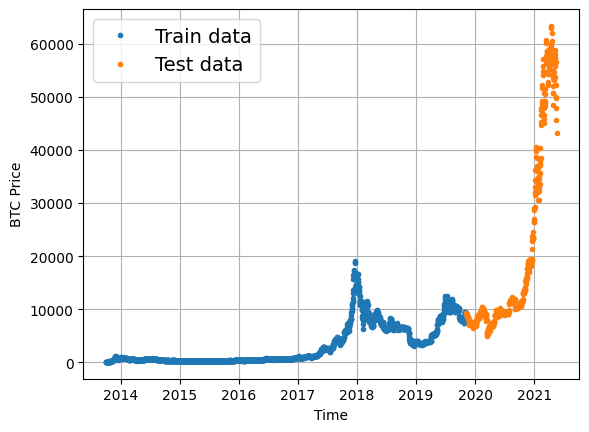

In [ ]:
# Test out plotting  fucntions
plot_time_series(timesteps=X_train,values=y_train, label="Train data")
plot_time_series(timesteps=X_test,values=y_test, label="Test data")

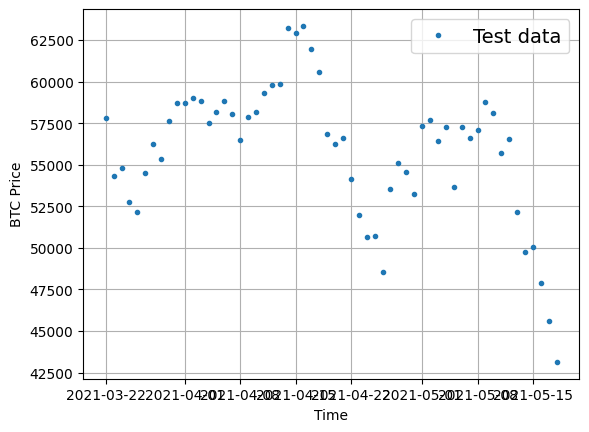

In [ ]:
# plot_time_series(timesteps=X_train,values=y_train, start=1500, label="Train data")
plot_time_series(timesteps=X_test,values=y_test,start=500, label="Test data")

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predcition

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the futre we're going to predict
* **Window size** = number of timesteps we're going to use to predict **Horizon**

Modelling experiments we're running:
* model 0  Naive model (baseline)
* model 1  Dense mdoel 1, horizon = 1, window = 7
* model 2  Same as 1, horizon = 1, window = 30
* model 3  Same as 1, horizon = 7, window = 30
* model 4  Conv1D
* model 6  LSTM
* model 7  Same as 1 (but with multivariate data)
* model 8  N-BEATs Algorithm
* model 9  Future predictin model (model to predict future values)
* model 10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for horizon of 1.

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

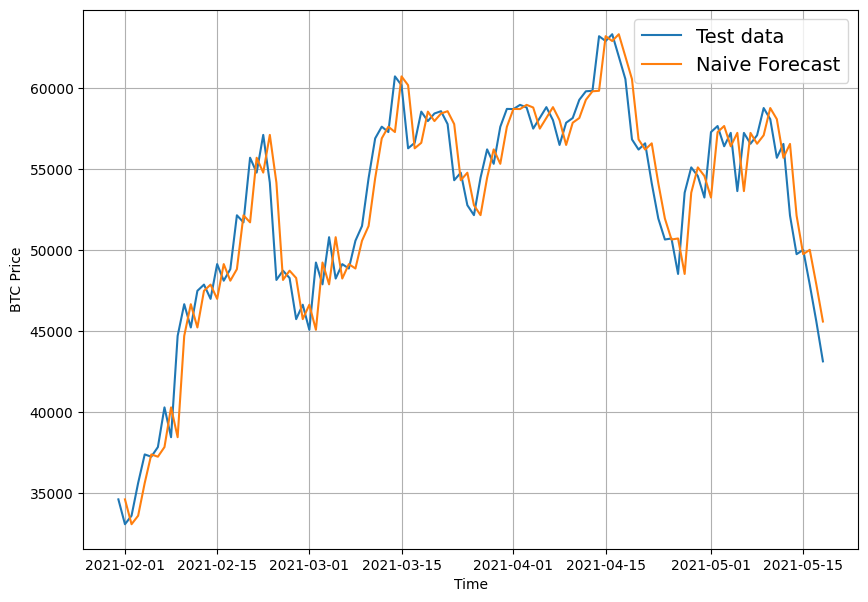

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=450, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=450, format='-', label="Naive Forecast")

> ⚒️ **Exercise**: spend 10 minutes reading the simple forecasts chapter of [forecasting: Principles in Practice](https://otexts.com/fpp3/simple-methods.html). And have as search to find out why the naive forecast is hard to beat, does the term augoregressive come up.

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root means square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error.

The main thing we're evaluating here is: **How do our model's forecast (y_pred) compare against the actual values (y_true or ground truth values)?**

📖 **Resource**: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8: https://otexts.com/fpp3/accuracy.html

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 only (hence the shift of 1)

  mase = mae / mae_naive_no_season
  return mase

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred=naive_forecast).numpy() # naive_forecast is 1 (near it)

0.9995699939182624

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  """
  lower value here is better model
  """
  # Make sure float 32 datatype {for metric calcuations}
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  # mse = tf.reduce_mean(tf.square(y_true-y_pred))
  # rmse = tf.math.sqrt(mse)
  # mape = tf.reduce_mean(tf.abs((y_true-y_pred)/ y_true)) * 100
  # mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 only (hence the shift of 1)
  # mase = mae / mae_naive_no_season

  # return {
  #     "mae": mae.numpy(),
  #     "mse": mse.numpy(),
  #     "rmse": rmse.numpy(),
  #     "mape": mape.numpy(),
  #     "mase": mase.numpy(),
  #         }


  # Calculate various evaluation metrics
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_true, y_pred)
  mse = tf.keras.metrics.MeanSquaredError()
  mse.update_state(y_true, y_pred)
  # mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse.result())
  mape = tf.keras.metrics.MeanAbsolutePercentageError()
  mape.update_state(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)



  return {
      "mae": mae.result().numpy(),
      "mse": mse.result().numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.result().numpy(),
      "mase": mase.numpy(),
          }



In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:], y_pred=naive_forecast)
naive_results

# lower value is better for all metrics

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
naive_forecast[-10:] # according to mae each value is 567 away from real value

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

# Tip if our prediction are near max, error percentage goes down as 567 mae is less than 63346 but at average and lower value, error goes up

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baseline and for actual forecasts

In this notebook, we're focused on Tensorflow and deep learning models.

However there are plenty of other styles of timeseries forecasting models we may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

We may we look at amazing facebook time series forecasting: https://github.com/facebookresearch/Kats for future learning.

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]

```

In [ ]:
len(y_train)

2229

In [ ]:
# What we want to do with our data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")


We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [ ]:
# let's setup global variable for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [ ]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: {[0, ,1, 2, 3, 4, 5, 6], [7]} # first 7 as features and last one as label
  """

  return x[:, :-horizon], x[:, -horizon:]  # tuple

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis = 0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've go a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

To speed things up, we'll leverage Numpy's array indexing.

must_learn_numpy_indexing: may be little tough but most do all: https://numpy.org/doc/stable/user/basics.indexing.html

Our function will:
1. Create a window step of specific window size (eg. [0,1,2,3,4,5,6]).
2. Use Numpy Indexing to create a 2D array of multiple window steps, for example: (increase of 1 in each):
```
[[0, 1, 2, 3, 4, 5, 6]],
[[1, 2, 3, 4, 5, 6, 7]],
[[2, 3, 4, 5, 6, 7, 8]],
[[3, 4, 5, 6, 7, 8, 9]],
```

3. Uses the 2D array of mulitple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_window()` function we created above to turn the window steps into window with a specified horizon.

> 📖 **Resources:** The function we're about to create has been adapted from the following article:
https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [ ]:
import numpy as np

In [ ]:
# Create function to view NumPy arrays as windows: much faster than using for loop: POWER OF NUMPY
def make_windows(x, window_size = WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into 2D array of sequential labelled windows of window_size with horizon size labels.
  """

  # 1. Create a window of specific window_size (add the horizon on the end of labeeling later)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  # window_size + horizon - 1 so when we react at the end we don't want to drift out of range and -1 or it will be plus for len(x) because up to element 7 away from end
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).T # Create 2D array of window of size  window size
  print(f"Window indexs:\n {window_indexes[:5], window_indexes.shape} \n\n")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  print(f"Window array:\n {windowed_array[:5], windowed_array.shape} \n\n\n")

  # 4. Get the labelled window
  windows, labels = get_labelled_window(windowed_array, horizon = horizon)
  print(f"Window :\n {windows[:5], windows.shape} \n\n\n")
  print(f"labels :\n {labels[:5], labels.shape} \n\n\n")

  return windows, labels


In [ ]:
len(prices)

2787

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexs:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11]]), (2780, 8)) 


Window array:
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116, 125.27966],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966, 125.9275 ]]), (2780, 8)) 



Window :
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
     

(2780, 2780)

In [ ]:
# View the first three 3 window /labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [ ]:
# View the  three 3 window /labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label [43144.47129086]


In [ ]:
prices[-1] # last label is our last value in prices array

43144.4712908603

🔑 **Note** You can find a function which achieves similar results to the ones we implemented above at tf.keras.preprocessing.timeseries_dataset_from_array(). Just like ours, it takes in an array and return a windowed datasets from benefit of returning data in the form of a tf.data. Dataset instance (we'll see how to do this with our own data later).

In [ ]:
# from tensorflow import keras
# dataset = keras.preprocessing.timeseries_dataset_from_array(data = prices[:-7],
#                                                             targets = prices[7:],
#                                                             sequence_length = 7,
#                                                             batch_size = None # default value
#                                                             )

## Turning window into training and test sets

In [ ]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2 ):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  print(int(len(windows)*0.8))
  # 80% train/ 20% test
  split_size = int(len(windows)*(1 - test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

2224


(2224, 556, 2224, 556)

In [ ]:
full_labels.shape

(2780, 1)

In [ ]:
1 - 0.2

0.8

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Check to see if train labels are same before and after windowing
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

Because our Model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want t0 ocomapre each of our model's best performance against the other model's best performace.

for example if our model performs the best on epochs 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiment"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name) +  ".keras",
                                            monitor = "val_loss",
                                            verbose = 0,
                                            save_best_only=True)

## Model 1: Dense model(window=7, Horizon =1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (large batch because only 7 data per week, small overall data).
* 100 epochs.



Why These values?

Druke those these hyperparamter out of lots of experimentaions.

* **HyperParameter** = values a machine learning parctitioner can adjust themselves.
* **Parameters** = values a model learns on its own.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is same as no activation: output same as input
], name = "model_1_dense") # name our model so we can save it by accesing its name by model_1.name

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. Fit the model
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)]
)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - loss: 1277.8143 - mae: 1277.8143 - mse: 4994590.5000 - val_loss: 2219.6448 - val_mae: 2219.6448 - val_mse: 12518575.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 275.2392 - mae: 275.2392 - mse: 286108.8750 - val_loss: 1066.6615 - val_mae: 1066.6615 - val_mse: 3773010.2500
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 184.2211 - mae: 184.2211 - mse: 163765.4688 - val_loss: 1003.2059 - val_mae: 1003.2059 - val_mse: 3275889.7500
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 169.1881 - mae: 169.1881 - mse: 151760.9219 - val_loss: 930.4292 - val_mae: 930.4292 - val_mse: 2721208.7500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 153.2359 - mae: 153.2359 - mse: 124284.8359 - val_loss: 849.2267 - val_mae: 849.2267 - val_mse: 2299369.5000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 142.9764 - mae: 142.9764 - mse: 109462.4531 - val_loss: 804.3649 - val_mae: 804.3649 -

In [ ]:
# Evaluate model on test data # remember this isnot best from model_1. We have saved best one with checkpoint callback
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 282.5276 - mae: 282.5276 - mse: 342287.3750


[566.0939331054688, 566.0939331054688, 1160423.625]

In [ ]:
# Load in saved best performing model from model_1 from saved checkpoint
model_1 = tf.keras.models.load_model("/content/model_experiment/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 281.6160 - mae: 281.6160 - mse: 342762.2812


[565.0377807617188, 565.0377807617188, 1158595.875]

## Making forecast with a model_1 (on test dataset)
To make "Forecast" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecast are into the future). Let's write a function to:

1. Take in a train_model.
2. Take in some input data (same kind of data the model was trained on).
3. Passes the input data to model's `predict()` method.
4. Returns the predictions.

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predcition

In [ ]:
# Make prediction using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10],len(model_1_preds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8858.411, 8799.179, 9047.088, 8783.698, 8731.459, 8724.698,
        8695.341, 8519.94 , 8460.428, 8534.367], dtype=float32)>,
 556)

In [ ]:
test_labels.shape # seems like extra dim but we dont want it it below so we use squeeze

(556, 1)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

model_1_results # results is very similar to naive model

{'mae': 565.0378,
 'mse': 1158595.9,
 'rmse': 1076.381,
 'mape': 2.5235534,
 'mase': 0.99261487}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
a = np.array([1,2,3,4,5])

In [ ]:
a[-12:]

array([1, 2, 3, 4, 5])

In [ ]:
len(test_labels[:,0])

556

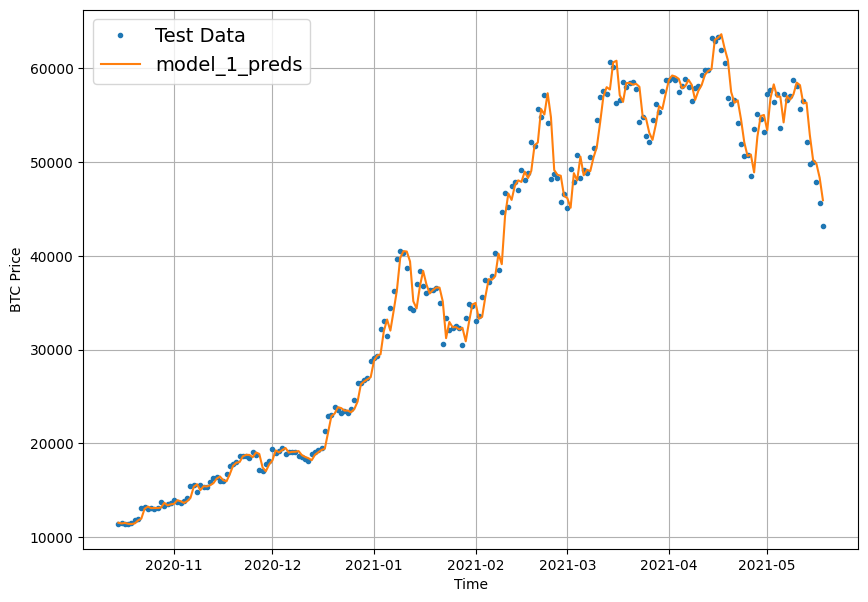

In [ ]:
# Let's plot our model 1 preformance
offset = 340
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels[:, 0],  # [:, 0 ] just because test_labels is 2D (556,1)
                 start=offset,
                 label= "Test Data" )
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

Why our prediction lags slighty behind actual data: read about **AutoCorrelation** in 2.8 of https://otexts.com/fpp3/acf.html

## Model_2: Dense (window = 30, horizon = 1)

In [ ]:
WINDOW_SIZE = 30 # use 30 prev timestep in past
HORIZON = 1 # predict one step at a time (one day of Bitcoin price from previous 30)

In [ ]:
len(prices)-30

2757

In [ ]:
# Make recreate window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexs:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]), (2757, 31)) 


Window array:
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.

(2757, 2757)

In [ ]:
# Create train and test windows for new window
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

2205


(2205, 552, 2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is same as no activation: output same as input
], name = "model_2_dense") # name our model so we can save it by accesing its name by model_1.name

# 2. Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. Fit the model
model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 847.3232 - mae: 847.3232 - mse: 2735898.5000 - val_loss: 2065.6663 - val_mae: 2065.6663 - val_mse: 10856608.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 329.9970 - mae: 329.9970 - mse: 468887.1562 - val_loss: 1301.9904 - val_mae: 1301.9904 - val_mse: 5263924.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 232.4633 - mae: 232.4633 - mse: 262258.5000 - val_loss: 1133.6560 - val_mae: 1133.6560 - val_mse: 4223549.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 190.0923 - mae: 190.0923 - mse: 184260.8594 - val_loss: 1023.6241 - val_mae: 1023.6241 - val_mse: 3246773.2500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 166.9374 - mae: 166.9374 - mse: 148244.0625 - val_loss: 907.0142 - val_mae: 907.0142 - val_mse: 2769135.7500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 159.3334 - mae: 159.3334 - mse: 132302.6250 - val_loss: 863.0082 - val_mae: 863.0082 - va

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 308.5728 - mae: 308.5728 - mse: 387617.2188


[605.8109741210938, 605.8109741210938, 1285286.0]

In [ ]:
# Load in the best performing model of model_2
model_2 = tf.keras.models.load_model("/content/model_experiment/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 301.2747 - mae: 301.2747 - mse: 374448.2500


[589.7105712890625, 589.7105712890625, 1248584.75]

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred= model_2_preds)
model_2_results

{'mae': 589.7106,
 'mse': 1248584.5,
 'rmse': 1117.4008,
 'mape': 2.696052,
 'mase': 1.0308199}

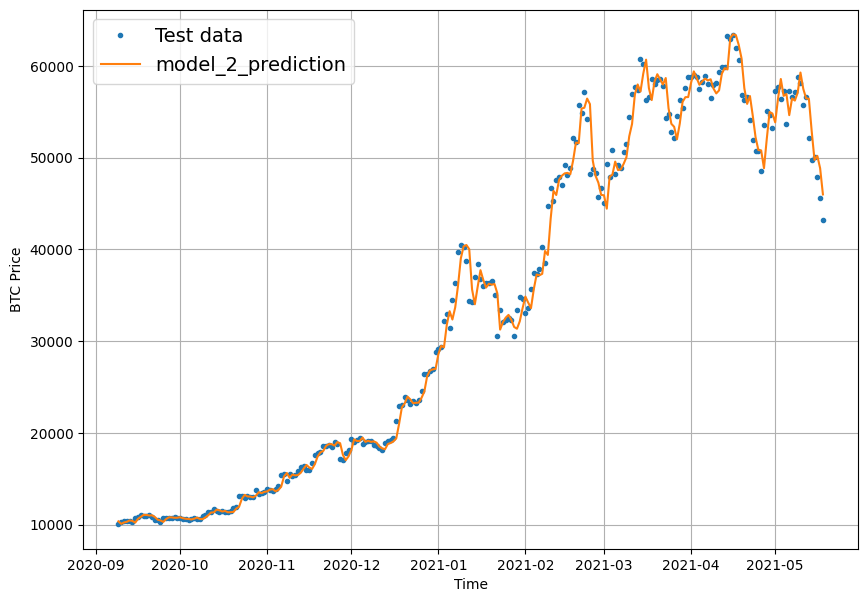

In [ ]:
offset = 300 # for zoom in
plt.figure(figsize=(10, 7))
# Account for test window offset when plotting
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                 values = test_labels[:, 0],
                 start=offset,
                 label="Test data")
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                 values = model_2_preds,
                 format="-",
                 start=offset,
                 label="model_2_prediction")


## Model 3: Dense (Window = 30, horizon = 7)

In [ ]:
WINDOW_SIZE = 30 # use 30 prev timestep in past
HORIZON = 7 # predict 7 step at a time ( 7 day of Bitcoin price from previous 30)

In [ ]:
# Make recreate window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexs:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40]]), (2751, 37)) 


Window array:
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121

(2751, 2751)

In [ ]:
# Create train and test windows for new window
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

2200


(2200, 551, 2200, 551)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    # Horizon is 7 so output seven value
    layers.Dense(HORIZON, activation="linear") # linear activation is same as no activation: output same as input
], name = "model_3_dense") # name our model so we can save it by accesing its name by model_1.name

# 2. Compile
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. Fit the model
model_3.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 2898.9927 - mae: 2898.9927 - mse: 30226538.0000 - val_loss: 3224.3660 - val_mae: 3224.3660 - val_mse: 28240002.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 633.6178 - mae: 633.6178 - mse: 1750973.1250 - val_loss: 2426.9644 - val_mae: 2426.9644 - val_mse: 16781070.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 495.1199 - mae: 495.1199 - mse: 1204918.2500 - val_loss: 2220.8088 - val_mae: 2220.8088 - val_mse: 14258773.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 448.8398 - mae: 448.8398 - mse: 1017951.7500 - val_loss: 2187.1934 - val_mae: 2187.1934 - val_mse: 13908814.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 416.4721 - mae: 416.4721 - mse: 890252.5625 - val_loss: 2135.8557 - val_mae: 2135.8557 - val_mse: 13255575.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 389.5590 - mae: 389.5590 - mse: 781952.6250 - val_loss: 1973.6851 - val_mae: 

In [ ]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 645.4801 - mae: 645.4801 - mse: 1603740.5000


[1257.391357421875, 1257.391357421875, 5443309.0]

In [ ]:
# load the best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("/content/model_experiment/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 644.5320 - mae: 644.5320 - mse: 1601926.8750


[1256.884521484375, 1256.884521484375, 5440927.5]

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5] # output from model_3 predict a week at a time

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9196.645 , 9587.129 , 9495.865 , 9448.4795, 9508.389 , 9609.577 ,
        9079.593 ],
       [9048.686 , 9256.283 , 9310.592 , 9230.864 , 9354.282 , 9283.266 ,
        8932.752 ],
       [8784.842 , 8999.435 , 9036.533 , 9060.587 , 9147.255 , 8941.943 ,
        8856.049 ],
       [8878.749 , 9299.328 , 9059.379 , 9109.913 , 9183.588 , 9043.506 ,
        8954.577 ],
       [9073.158 , 9191.066 , 8963.5   , 9074.739 , 9169.136 , 9085.497 ,
        8722.614 ]], dtype=float32)>

In [ ]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8889.5  , 8803.158, 8728.846, 8580.293, 8346.553], dtype=float32)>

In [ ]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [ ]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results # seems like each result result for each value

{'mae': 1256.8845,
 'mse': 5440927.5,
 'rmse': 2332.5796,
 'mape': 5.711878,
 'mase': 2.2365558}

## Make our evaluation function work for larger horizon

In [ ]:
model_3_results["mae"].shape, model_3_results["mae"].ndim

((), 0)

In [ ]:
model_2_results["mae"].shape, model_2_results["mae"].ndim # no shape scaler value

((), 0)

In [ ]:
tf.reduce_mean(model_3_results["mae"]).numpy() # same as model_3.evaluate

1256.8845

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 644.5320 - mae: 644.5320 - mse: 1601926.8750


[1256.884521484375, 1256.884521484375, 5440927.5]

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  """
  lower value here is better model
  """
  # Make sure float 32 datatype {for metric calcuations}
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  # mse = tf.reduce_mean(tf.square(y_true-y_pred))
  # rmse = tf.math.sqrt(mse)
  # mape = tf.reduce_mean(tf.abs((y_true-y_pred)/ y_true)) * 100
  # mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 only (hence the shift of 1)
  # mase = mae / mae_naive_no_season

  # return {
  #     "mae": mae.numpy(),
  #     "mse": mse.numpy(),
  #     "rmse": rmse.numpy(),
  #     "mape": mape.numpy(),
  #     "mase": mase.numpy(),
  #         }


  # Calculate various evaluation metrics
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_true, y_pred)
  mse = tf.keras.metrics.MeanSquaredError()
  mse.update_state(y_true, y_pred)
  # mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse.result())
  mape = tf.keras.metrics.MeanAbsolutePercentageError()
  mape.update_state(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)



  return {
      "mae": mae.result().numpy(),
      "mse": mse.result().numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.result().numpy(),
      "mase": mase.numpy(),
          }


In [ ]:
# Get the model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1256.8845,
 'mse': 5440927.5,
 'rmse': 2332.5796,
 'mape': 5.711878,
 'mase': 2.2365558}

In [ ]:
model_1_results, naive_results

({'mae': 565.0378,
  'mse': 1158595.9,
  'rmse': 1076.381,
  'mape': 2.5235534,
  'mase': 0.99261487},
 {'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957})

In [ ]:
model_3_preds[:,6][:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9079.593, 8932.752, 8856.049, 8954.577, 8722.614, 8639.57 ,
       8555.412, 8642.961, 8506.967, 8316.68 ], dtype=float32)>

We've made and evaluated predictions with `model_3`. Let's visualize, visualize, visualize

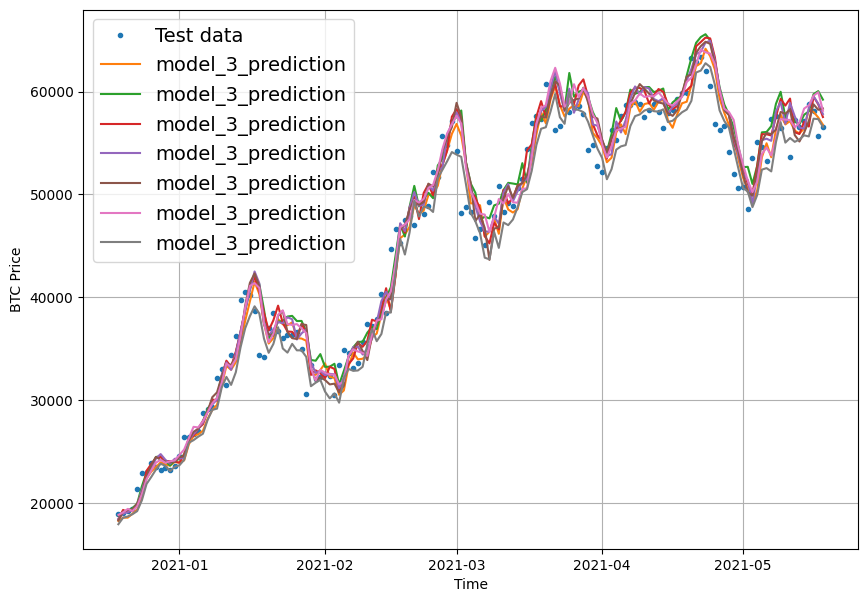

In [ ]:
offset = 400 # for zoom in
plt.figure(figsize=(10, 7))
# Account for test window offset when plotting
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                 values = test_labels[:, 0],
                 start=offset,

                 label="Test data")
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                #  values = model_3_preds[:,6],
                 values = model_3_preds,
                 format="-",
                 start=offset,
                 label="model_3_prediction")

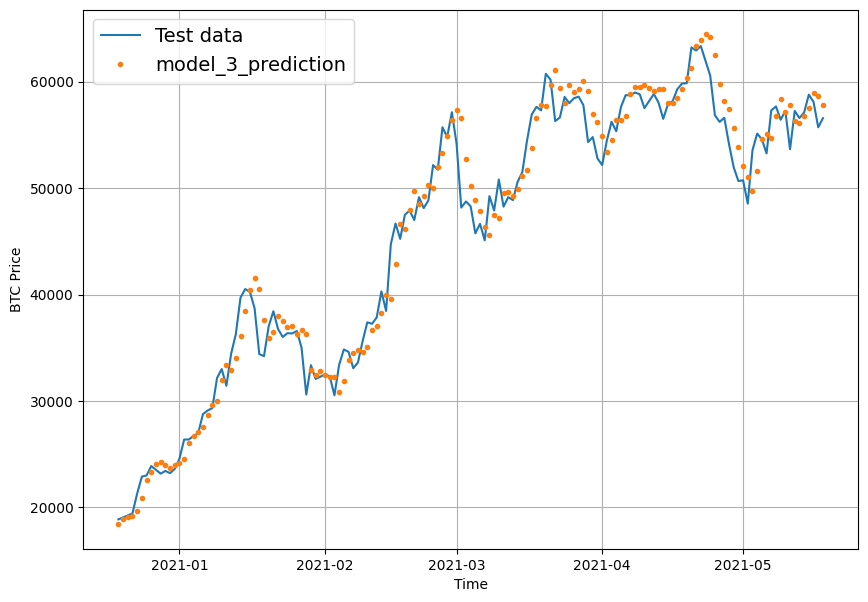

In [ ]:
offset = 400 # for zoom in
plt.figure(figsize=(10, 7))
# Account for test window offset when plotting
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                 values = test_labels[:, 0],
                 start=offset,
                 format='-',
                 label="Test data")
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                #  values = model_3_preds[:,6],
                 # no a good way, just to make plot only
                 # when we use mean we will lose some value
                 values = tf.reduce_mean(model_3_preds, axis = 1), # reducing and gettting mean. axis = 1 means mean of each row or mean along columns (column1+column2..../number)
                 start=offset,
                 label="model_3_prediction")

## Which of our model is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone.

<Axes: >

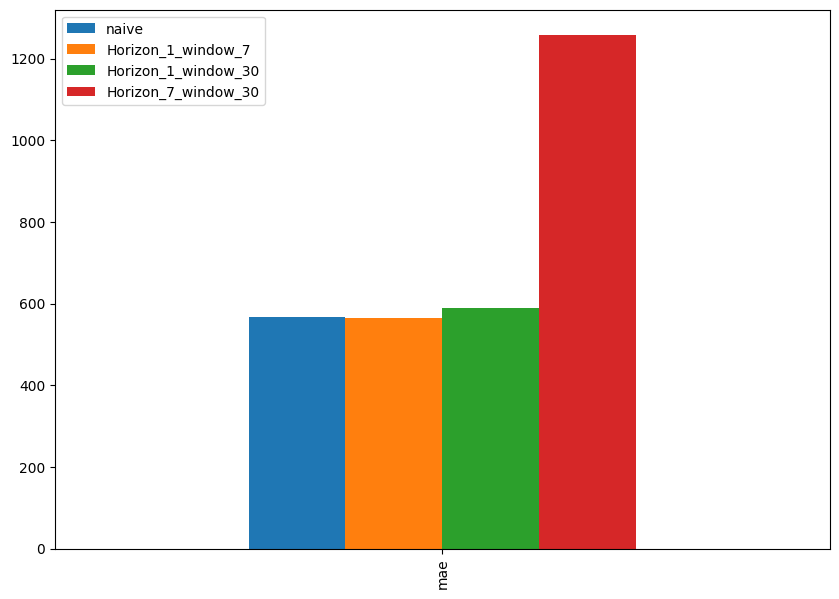

In [ ]:
pd.DataFrame({
    "naive": naive_results["mae"],
    "Horizon_1_window_7": model_1_results["mae"],
    "Horizon_1_window_30": model_2_results["mae"],
    "Horizon_7_window_30": model_3_results["mae"],
             },
     index=["mae"]
    ).plot(figsize=(10, 7), kind="bar")

    # seems like naive model is best because of autocorrelation of time series (google serach, or in https://dev.mrdbourke.com/tensorflow-deep-learning/)

## Model 4: Conv1D

In [ ]:
HORIZON = 1 # predict next day of Bitcoin price
WINDOW_SIZE = 7 # use previous week worth data

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexs:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11]]), (2780, 8)) 


Window array:
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116, 125.27966],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966, 125.9275 ]]), (2780, 8)) 



Window :
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
     

(2780, 2780)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

2224


(2224, 2224, 556, 556)

To use the Conv1D, we need an input shape of : `(batch_size, timesteps, input_dim)`...

However our data isn't in that shape yet...

In [ ]:
#Check data input shape
train_windows[0].shape # returns(WINDOW_SIZE, )

(7,)

In [ ]:
# Before we pass our data to the conv1D layer, we have to reshape it in order to make sure it works.
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
tf.expand_dims(x, axis = 1)

<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]])>

In [ ]:
# layers.lambda helps use lambda like in python
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)) # add an extra dimension for  `input_dim`

In [ ]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded_shape:{expand_dims_layer(x).shape}\n\n")
print(f"Expanded_shape values:\n{expand_dims_layer(x)}")

Original shape: (7,)
Expanded_shape:(7, 1)


Expanded_shape values:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
# 1. Create a Conv1D

from tensorflow.keras import layers

inputs = layers.Input(shape=(7,), dtype="float64")
print(inputs.shape)

# lambda layer
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
print(expand_dims_layer.shape)

# Conv1D model, filters = 128, kernel_size=, padding...
x = layers.Conv1D(filters=128, # each review will diveded into 64 parts
                  kernel_size=5, # 5 words at a time
                  strides=1,
                  activation='relu',
                  #padding should be causal for time series, where temporal data order shouldn't be mess with
                  padding='causal')(expand_dims_layer) # padding will compress input like 15 to 13 if 'valid' (default). if 'same' no-compression
print(x.shape)

outputs = layers.Dense(HORIZON, activation="linear")(x) # HORIZON = 1 # number of our ouptut = 1
print(outputs.shape)

model_4 = tf.keras.Model(inputs, outputs, name='model_4_conv1D')

# 2. Compile
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])



(None, 7)
(None, 1, 7)
(None, 1, 128)
(None, 1, 1)


In [ ]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3. Fit the model
model_4.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 2578.4758 - mae: 2578.4758 - mse: 17006200.0000 - val_loss: 2806.0168 - val_mae: 2806.0168 - val_mse: 16277287.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 350.2945 - mae: 350.2945 - mse: 457157.2188 - val_loss: 1067.4352 - val_mae: 1067.4352 - val_mse: 3546607.5000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 213.1155 - mae: 213.1155 - mse: 211049.0938 - val_loss: 1068.8512 - val_mae: 1068.8512 - val_mse: 3789746.2500
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 185.2000 - mae: 185.2000 - mse: 165046.7969 - val_loss: 994.4662 - val_mae: 994.4662 - val_mse: 3314778.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174.1960 - mae: 174.1960 - mse: 157160.9062 - val_loss: 999.3957 - val_mae: 999.3957 - val_mse: 3225962.2500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170.6376 - mae: 170.6376 - mse: 153861.7500 - val_loss: 1007.9254 - val_mae: 1007.9254 - 

In [ ]:
train_windows.shape

(2224, 7)

In [ ]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [ ]:
model_2.summary()

Model: "model_2_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,293 (48.02 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,196 (32.02 KB)

In [ ]:
# Evaluate model...
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 287.7093 - mae: 287.7093 - mse: 352558.4688


[572.2342529296875, 572.2342529296875, 1191186.75]

In [ ]:
# Load back in best performing of model_4
# model_4 = tf.keras.models.load_model("/content/model_experiment/model_4_conv1D.keras")
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 287.7093 - mae: 287.7093 - mse: 352558.4688


[572.2341918945312, 572.2341918945312, 1191186.75]

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8904.1045, 8795.683 , 9008.896 , 8818.946 , 8766.972 , 8748.892 ,
       8699.873 , 8546.474 , 8478.925 , 8529.04  ], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)
model_4_results

{'mae': 572.2342,
 'mse': 1191186.6,
 'rmse': 1091.4149,
 'mape': 2.5763752,
 'mase': 1.005257}

In [ ]:
model_1_results

{'mae': 565.0378,
 'mse': 1158595.9,
 'rmse': 1076.381,
 'mape': 2.5235534,
 'mase': 0.99261487}

## Model 5: RNN (LSTM)

In [ ]:
# 1. Create a LSTM model as hidden layer

from tensorflow.keras import layers

inputs = layers.Input(shape=(WINDOW_SIZE,), dtype="float64") # window_size = 7
print(inputs.shape)

# lambda layer
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
print(x.shape)

#LSTM layer
# x = layers.LSTM(units=128, return_sequences=True)(expand_dims_layer) # return_sequences = true to maintain ndim =3 otherwise output of lstm will be of 2 ndim
# print(x.shape)
x = layers.LSTM(units=128, activation="relu")(x) # output will of ndim =2 # default activation is tanh but here we need relu
print(x.shape)

# x = layers.Dense(32, activation="relu")(x)
# print(x.shape)



outputs = layers.Dense(HORIZON, activation="linear")(x) # HORIZON = 1 # number of our ouptut = 1
print(outputs.shape)

model_5 = tf.keras.Model(inputs, outputs, name='model_5_conv1D')

# 2. Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

(None, 7)
(None, 1, 7)
(None, 128)
(None, 1)


In [ ]:
# 3. Fit the model
model_5.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - loss: 2814.8674 - mae: 2814.8674 - mse: 19054924.0000 - val_loss: 13653.5615 - val_mae: 13653.5615 - val_mse: 328780704.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1849.6105 - mae: 1849.6105 - mse: 8441714.0000 - val_loss: 5721.5054 - val_mae: 5721.5054 - val_mse: 59540544.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 558.3651 - mae: 558.3651 - mse: 1043870.6250 - val_loss: 1550.9905 - val_mae: 1550.9905 - val_mse: 6862460.5000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 221.5627 - mae: 221.5627 - mse: 201880.4219 - val_loss: 1079.8597 - val_mae: 1079.8597 - val_mse: 3537153.7500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179.2648 - mae: 179.2648 - mse: 165539.2031 - val_loss: 1092.3621 - val_mae: 1092.3621 - val_mse: 3560528.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 176.6121 - mae: 176.6121 - mse: 163264.2188 - val_loss: 1022.1536 - val_mae:

In [ ]:
model_5.summary()

Model: "model_5_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_2 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,285 (817.52 KB)

 Trainable params: 69,761 (272.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 139,524 (545.02 KB)

In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 316.4365 - mae: 316.4365 - mse: 398393.5938


[631.9315185546875, 631.9315185546875, 1315620.125]

In [ ]:
# Load in best version of model_5 and evaluate on the test data
# model_5 = tf.keras.models.load_model("/content/model_experiment/model_5_conv1D.keras")
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 316.4365 - mae: 316.4365 - mse: 398393.5938


[631.9315185546875, 631.9315185546875, 1315620.125]

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8831.753, 8694.976, 8859.988, 8700.509, 8647.433], dtype=float32)>

In [ ]:
# Evaluate model_5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results
# still our model_1 is best one

{'mae': 631.9316,
 'mse': 1315620.2,
 'rmse': 1147.0049,
 'mape': 2.8553019,
 'mase': 1.1101288}

In [ ]:
model_1_results

{'mae': 565.0378,
 'mse': 1158595.9,
 'rmse': 1076.381,
 'mape': 2.5235534,
 'mase': 0.99261487}

🔑**Note:** Because neural networks are such powerfull algorithm, they can be used for almost any problem, however, that doesn't means they'll achieve performant or usable results. You're probably starting to clue onto this now

## Make a multivariate  time series dataset

Before we add a feature to our time series, what is a feature we can use?

Bitcoin price is open system almost anything and affect it on real time.
One feature we could add is whether or not Elon musk tweeted on that day of Bitcoin...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about bitcoin halving events?:(google serach what is bitcoin halving?)
https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving


In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add bitcoin halving to our dataset
block_reward_1 = 50 # 3 january 2009 - this block reward isn't in our dataset (our dataset start at 01 october 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 May 2020

# BLock reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

In [ ]:
# Create date ranges of where specific block_reward values should be
# finding the difference
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

# everything upto 1012 is block_reward_2, everything between 1012 and 2421 is block_reward_3, everything onward 2421 is block reward 4

(1012, 2421)

In [ ]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [ ]:

# Add in block_Reward values, as feature to our dataframe
# -1 means last column which is BLock_reward
# everything upto 1012 is block_reward_2, everything between 1012 and 2421 is block_reward_3, everything onward 2421 is block reward 4
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4


In [ ]:
bitcoin_prices_block.iloc[1500:1505]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5


In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

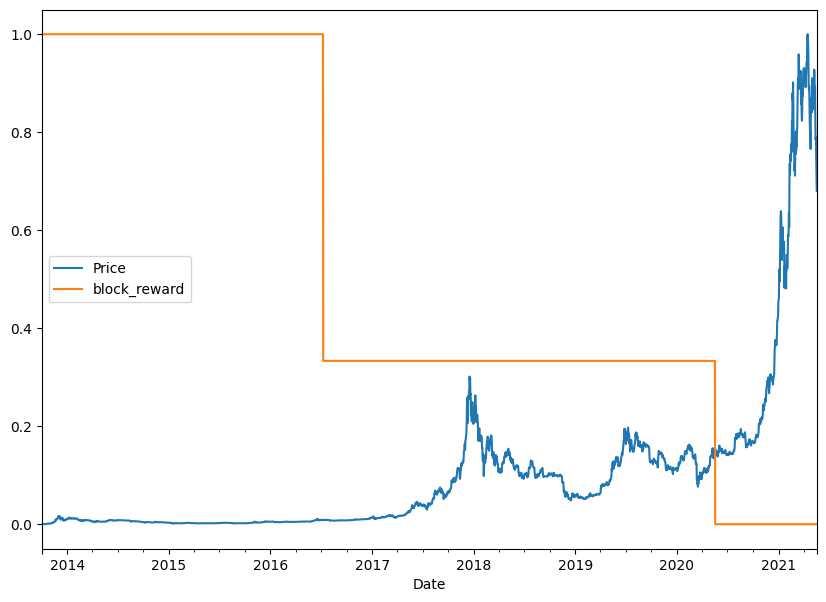

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale # transform features between 0 and 1 (given range default value here(0-1))

# we need to get both Prices and block reward at same scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns = bitcoin_prices_block.columns, # for labels
                                     index = bitcoin_prices_block.index # for making size of plot match total values in datafram
                                     )
scaled_price_block_df.plot( figsize=(10,7))

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper function above.

However, since we've got multivaritate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

look at 2013-10-08 ( these where real data from model start) ( we remove any row with NaN values
```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [ ]:
#  Create X (windows) and y (horizons) features

# dropna removes any rows with NaN values

# for X we also remove Price column which is the second column because it should be for y
X = bitcoin_prices_windowed.dropna().drop("Price", axis = 1).astype(np.float32)

# Taking only Price Column as y
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
# Make train and test sets using indexing because we can use train_test_split on timeseries data
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
X_test

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2019-11-10,12.50,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039,9290.896484
2019-11-11,12.50,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039
2019-11-12,12.50,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930
2019-11-13,12.50,8711.534180,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609
2019-11-14,12.50,8760.892578,8711.534180,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953
...,...,...,...,...,...,...,...,...
2021-05-14,6.25,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094,56583.851562
2021-05-15,6.25,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094
2021-05-16,6.25,50032.691406,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938


## Model 6: Dense (multivariate time series)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is same as no activation: output same as input
], name = "model_6_dense_multivariate") # name our model so we can save it by accesing its name by model_1.name

# 2. Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. Fit the model
model_6.fit(x = X_train,
            y = y_train,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (X_test, y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name)]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 1514.1876 - mae: 1514.1876 - mse: 6951713.0000 - val_loss: 2829.9524 - val_mae: 2829.9524 - val_mse: 19570612.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 341.6125 - mae: 341.6125 - mse: 426906.2188 - val_loss: 1283.2758 - val_mae: 1283.2758 - val_mse: 5465189.5000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 240.1512 - mae: 240.1512 - mse: 259178.9844 - val_loss: 1220.7305 - val_mae: 1220.7305 - val_mse: 4833158.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 212.0951 - mae: 212.0951 - mse: 222502.2812 - val_loss: 1180.6990 - val_mae: 1180.6990 - val_mse: 4530767.5000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 202.4040 - mae: 202.4040 - mse: 209576.0156 - val_loss: 1183.1227 - val_mae: 1183.1227 - val_mse: 4385516.5000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 196.4144 - mae: 196.4144 - mse: 198929.2344 - val_loss: 1141.4209 - val_mae: 1141.4209

In [ ]:
model_6.summary()

Model: "model_6_dense_multivariate"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,845 (15.02 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,564 (10.02 KB)

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 285.0394 - mae: 285.0394 - mse: 346345.2188


[568.6820068359375, 568.6820068359375, 1166567.5]

In [ ]:
#Load in and evaluate best performing of model_6
model_6 = tf.keras.models.load_model("/content/model_experiment/model_6_dense_multivariate.keras")
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 285.0394 - mae: 285.0394 - mse: 346345.2188


[568.6820068359375, 568.6820068359375, 1166567.5]

In [ ]:
# Make predictions with our LSTM model
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8860.213, 8787.479, 9048.797, 8788.619, 8726.141], dtype=float32)>

In [ ]:
# Evaluate prediction to get eval-metrics
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)
model_6_results

# same as model_1

{'mae': 568.682,
 'mse': 1166567.6,
 'rmse': 1080.0776,
 'mape': 2.5524383,
 'mase': 0.99901676}

In [ ]:
model_1_results

{'mae': 565.0378,
 'mse': 1158595.9,
 'rmse': 1076.381,
 'mape': 2.5235534,
 'mase': 0.99261487}

📖 **Resource**: For different ideas on how to improve a neural network model (from a model perspective), refer to the Improving a model section in notebook 02.

🛠 **Exercise(s)**:

* Try adding an extra tf.keras.layers.Dense() layer with 128 hidden units to model_6, how does this effect model performance?
* Is there a better way to create this model? As in, should the block_reward feature be bundled in with the Bitcoin historical price feature? Perhaps you could test whether building a multi-input model (e.g. one model input for Bitcoin price history and one model input for block_reward) works better? See Model 4: Hybrid embedding section of notebook 09 for an idea on how to create a multi-input model.

https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#model-6-dense-multivariate-time-series

## Model 7: N-BEATS algorithm

Let's now try to build the biggest baddest time series forecasting model we've build so far.

More specifically, we're going to be relicating the algorithm in the fig 1 of the following paper:https://arxiv.org/pdf/1905.10437 or https://arxiv.org/abs/1905.10437

Why?

* This will allow us to practice replicating a paper with Tensorflow code.
* We will see how to use TensorFlow layer subclassing (to make our own custom layer).
* Get experience using the Functional API to create architecture.
* Potentially get state of the art results on our problem.

### Building and testing the N-BEATS Block layer

Beacause the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing:
https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing

In [ ]:
import tensorflow as tf

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create NBeatBlock custom layer.
class NBeatBlock(tf.keras.layers.Layer): # layers.Layer is used create layer that doesn't consist in tensorflow
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs # kwargs is for all the arguments for the parent class (input_shape,  trainable, name)
               ):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers(n_layers) each has ReLU activation and n_neurons
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = "relu") for _ in range(n_layers)]

    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = "linear", name ="theta")

  def call(self, inputs): # call method is what run when the layer is called. Input to Output
    x = inputs
    for layer in self.hidden:
      x = layer(x) # x will get continuously updated as x get passed in each fully connected hidden layer
    theta = self.theta_layer(x)
    #output the backcast and the forecast from theta
    # print("backcast: ",theta[:, :self.input_size])
    # print("forecast: ",theta[:, -self.horizon])
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon]
    return backcast, forecast

Let's test our NBeatBlock class.

To do we'll make some dummy input and output.

In [ ]:
tf.random.set_seed(42)
# Set up dummy NBeatBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatBlock(input_size = WINDOW_SIZE,
                                      theta_size = WINDOW_SIZE + HORIZON, # backcast + forecast
                                      horizon = HORIZON,
                                      n_neurons = 128, # how wide
                                      n_layers = 4 # How deep
                                      )

In [ ]:
tf.range(WINDOW_SIZE)

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>

In [ ]:
tf.expand_dims(tf.range(WINDOW_SIZE) + 1,axis = 0)

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Create dummy inputs (have to be same size as input_size) for shape error
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1,axis = 0) # input shape to the model has to reflect dense layer input requirements (ndim  = 2 )
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NbeatBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer ( They'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.6594842  -0.6426199   0.3925683   0.07191586 -0.04425877 -0.18121238
 -0.21435884]
Forecast: 1.2471262216567993


## Preparing data for the N-Beats Algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide:
https://www.tensorflow.org/guide/data_performance

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create NBEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price + {i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods = i+1)
bitcoin_prices_nbeats.head()

,Price,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_nbeats.dropna().drop("Price", axis = 1).head()

,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,
2013-10-08,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
# Make Features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis = 1) # first dropping every row with NAN value than dropping whole Price column
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
X.head()

,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,
2013-10-08,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
y.head()

,Price
Date,
2013-10-08,123.03300
2013-10-09,124.04900
2013-10-10,125.96116
2013-10-11,125.27966
2013-10-12,125.92750


In [ ]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE) # autotune will figure out ideal no cpu for prefetch and prepare data
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset



(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorthm has a fair few numbers of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437

In [ ]:
# Table 18: https://arxiv.org/pdf/1905.10437
# Values from N-Beats paper
N_EPOCHS = 5000
N_NEURONS = 512 # Width in paper
N_LAYERS = 4
N_STACKS = 30

# here lookback period is 1H or 1 times horizon. here horizon is 1. In paper many other lookback period.
INPUT_SIZE = WINDOW_SIZE * HORIZON # lookback period in paper, 3H means 3 times the horizon in paper.
THETA_SIZE = INPUT_SIZE + HORIZON # backcast + forecast

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual Connections

Before we can craft our N-Beats model, we need two layers for the residual connections (substact and add)

The N-Beats algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-beats paper) ( back cast is substracted through each block and fore cast is added in each stack

for more residual connection see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet

In [ ]:
from tensorflow.keras import layers
# Make tensor
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

print(tensor_1, tensor_2)

# SUbstract
substracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"\n\nInput tensors: {tensor_1.numpy()} and {tensor_2.numpy()}")
print(f"Subtracted: {substracted.numpy()}")
print(f"Added: {added.numpy()}")

tf.Tensor([10 11 12 13 14 15 16 17 18 19], shape=(10,), dtype=int32) tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


Input tensors: [10 11 12 13 14 15 16 17 18 19] and [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-beats Algorithm

1. Setup an instance of the N-Beats block layer using `NBeatBlock` (this'll be the initial block used for the network, the rest will be crated as part of stacks.

2. Create an input layer for the N-Beats stack (we'll be using the keras functional api)

3. Make the initial backcast and forecast for the model with the layer create in (1)

4. Use for loop to create stacks of block layers.

5. Use the `NBeatBlocks` class within the for loop in (4) to create blocks which return backcast and block-level forecasts.

6. Create the double residual stack using add and substract layers.

7. Put the model inputs and outputs together using `tf.keras.Model()`

8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section - section 5.2 of NBeats paper.

9. Fit the N-Beats model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - beacause the model will be trained for so long, we;ll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps toward best performance).



In [ ]:
tf.random.set_seed(42)

# 1. Setup an instance of the N-Beats block layer using NBeatBlock (this'll be the initial block used for the network, the rest will be crated as part of stacks.
nbeats_block_layer = NBeatBlock(input_size = INPUT_SIZE,
                                theta_size = THETA_SIZE, # no of hidden units in your theta layers
                                horizon = HORIZON,
                                n_neurons = N_NEURONS,
                                n_layers = N_LAYERS,
                                name = "Inintial_Block")



# 2. Create an input layer for the N-Beats stack (we'll be using the keras functional api)
stack_input = layers.Input(shape=(INPUT_SIZE,), name = "stack")



# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction) so we want to resdiual connection (+) in our for loop stacking. look at section 3.1 picture
residuals, forecast = nbeats_block_layer(stack_input)



# 4. Use for loop to create stacks of block layers.
# N_STACKS-1 beacuse we have already created 1 block just above in 3
for i, _ in enumerate(range(N_STACKS-1)): # N_STACKS = 30
  # 5. Use the NBeatBlocks class within the for loop in (4) to create block which return backcast as well as forecast.
  backcast, block_forecast = NBeatBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking,
  residuals = layers.subtract([residuals, backcast], name = f"substract_{i}") # creating new residual (-)
  forecast = layers.add([forecast, block_forecast], name = f"add_{i}") # adding the forecast (+)



# 7. Put the stack model together
model_7 = tf.keras.Model(inputs = stack_input,
                          outputs = forecast,
                          name  = "model_7_N-Beats")

# 8. Compile model with MAE loss
model_7.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])


In [ ]:
model_7.summary()

Model: "model_7_N-Beats"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ stack (InputLayer)        │ (None, 7)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Inintial_Block            │ [(None, 7), (None)]    │        796,168 │ stack[0][0]            │
│ (NBeatBlock)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_0             │ [(None, 7), (None)]    │        796,168 │ Inintial_Block[0][0]   │
│ (NBeatBlock)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ substract_0 (Subtract)    │ (None, 7)              │              0 │ Inintial_Block[0][0],  │
│                           │                        │                │ NBeatsBlock_0[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_1             │ [(None, 7), (None)]    │        796,168 │ substract_0[0][0]      │
│ (NBeatBlock)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ substract_1 (Subtract)    │ (None, 7)              │              0 │ substract_0[0][0],     │
│                           │                        │                │ NBeatsBlock_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_2             │ [(None, 7), (None)]    │        796,168 │ substract_1[0][0]      │
│ (NBeatBlock)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ substract_2 (Subtract)    │ (None, 7)              │              0 │ substract_1[0][0],     │
│                           │                        │                │ NBeatsBlock_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_3             │ [(None, 7), (None)]    │        796,168 │ substract_2[0][0]      │
│ (NBeatBlock)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ substract_3 (Subtract)    │ (None, 7)              │              0 │ substract_2[0][0],     │
│                           │                        │                │ NBeatsBlock_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_4             │ [(None, 7), (None)]    │        796,168 │ substract_3[0][0]      │
│ (NBeatBlock)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ substract_4 (Subtract)    │ (None, 7)              │              0 │ substract_3[0][0],     │
│                           │                        │                │ NBeatsBlock_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeatsBlock_5             │ [(None, 7), (None)]    │        796,168 │ substract_4[0][0]      │
│ (NBeatBlock)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ substract_5 (Subtract

 Total params: 23,885,040 (91.11 MB)

 Trainable params: 23,885,040 (91.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%%time
# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose = 0, # hide
            callbacks = [
                # Eary stopping callback
                tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                          patience = 200, # if model doesnot imporve for 200 epochs than we stop training),
                                                          restore_best_weights = True), # load the before 200 epochs weights

                # Reduce Learning rate
                tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                     factor = 0.1, # reduce by factor of 0.1 # default
                                                     patience=100,
                                                     verbose=1) # verbose if lr is decrease
                ]
)


Epoch 748: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1023: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1123: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 43s, sys: 5.86 s, total: 4min 49s
Wall time: 6min 54s


In [ ]:
# Evaluate predictions with N-Beats model
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 571.8490 - mae: 571.8490 - mse: 1163210.1250


[571.8489990234375, 571.8489990234375, 1163210.125]

In [ ]:
# make Prediction with N-Beats model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8826.837 , 8759.828 , 9019.59  , 8738.6875, 8735.139 , 8727.379 ,
       8662.751 , 8484.899 , 8456.016 , 8507.303 ], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)
model_7_results

{'mae': 571.849,
 'mse': 1163210.1,
 'rmse': 1078.5222,
 'mape': 2.641453,
 'mase': 1.0045803}

In [ ]:
model_1_results

{'mae': 565.0378,
 'mse': 1158595.9,
 'rmse': 1076.381,
 'mape': 2.5235534,
 'mase': 0.99261487}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Even with all of those special layers and hand-crafted network, it looks like the N-Beats model doesn't perform as well as `model_1` or the original naive forecast

This goes to show the power of smaller networks as well as the fact not all larger model are better suited for a certain type of data

### Plotting the N-Beats architecutre we've created

In [ ]:
# Plot the N-Beats model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes = True)

## Model 8: Creating an ensemble (stacking different model together)

An ensemble leverages the wisdom of the crowd effect.

It combines many *different* models to predict a common goal.

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, If num_iter = 10, a list of 30 trained trained models will be returned:
  i.e 10 * len(["mae","mse","mape"]) = 30.
  """

  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    #Build and fit a new model with different loss functions
    for loss_function in loss_fns:
      print(f"OPtimizing model by reducting: {loss_function} for {num_epochs} epochs, model number:{i}")

      # Construct a simple model (simialr to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layer with normal distribution for estimating prediction interval on
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"), # weights are initialized in random . kernel_initializer tell what types of pattern to initialized with
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(horizon, activation="linear")
      ])

      # Compile the model with current loss function
      model.compile(loss = loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [
                    tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                          patience = 200,
                                                          restore_best_weights = True),
                    tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                         patience = 100,
                                                         verbose = 1)])

      # Append fitted model t0 list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

OPtimizing model by reducting: mae for 1000 epochs, model number:0

Epoch 115: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 701: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 801: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
OPtimizing model by reducting: mse for 1000 epochs, model number:0

Epoch 919: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
OPtimizing model by reducting: mape for 1000 epochs, model number:0

Epoch 120: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 897: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 997: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
OPtimizing model by reducting: mae for 1000 epochs, model number:1
OPtimizing model by reducting: mse for 1000 epochs, model number:1

Epoch 349: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 449: ReduceLROnPl

In [ ]:
len(ensemble_models)

15

In [ ]:
ensemble_models

[<Sequential name=sequential, built=True>,
 <Sequential name=sequential_1, built=True>,
 <Sequential name=sequential_2, built=True>,
 <Sequential name=sequential_3, built=True>,
 <Sequential name=sequential_4, built=True>,
 <Sequential name=sequential_5, built=True>,
 <Sequential name=sequential_6, built=True>,
 <Sequential name=sequential_7, built=True>,
 <Sequential name=sequential_8, built=True>,
 <Sequential name=sequential_9, built=True>,
 <Sequential name=sequential_10, built=True>,
 <Sequential name=sequential_11, built=True>,
 <Sequential name=sequential_12, built=True>,
 <Sequential name=sequential_13, built=True>,
 <Sequential name=sequential_14, built=True>]

### Make predictions with our ensemble models

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    ensemble_preds.append(model.predict(data))
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models = ensemble_models,
                                     data = test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
CPU times: user 2.56 s, sys: 60.6 ms, total: 2.62 s
Wall time: 4.5 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8829.103,  8791.308,  9044.507, ..., 50052.31 , 47852.95 ,
        45963.848],
       [ 8792.855,  8793.551,  9094.472, ..., 50248.316, 48160.535,
        46008.54 ],
       [ 8824.082,  8794.493,  9065.401, ..., 50239.836, 48173.445,
        45311.418],
       ...,
       [ 8689.604,  8761.323,  9103.945, ..., 50292.45 , 49382.773,
        46890.72 ],
       [ 8831.512,  8696.598,  8993.999, ..., 49167.656, 47916.812,
        46376.582],
       [ 8828.623,  8797.617,  9049.372, ..., 49685.887, 48502.363,
        46091.273]], dtype=float32)>

Our ensemble preds come out in multiple dimensions but to combine into point predictions we can leverage the mean of all of the predictions or the median.

How to combine ensemble learning predictions: - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [ ]:
# using mean value
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean, ensemble_mean.shape

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8784.706 ,  8765.671 ,  9063.75  ,  8708.436 ,  8740.444 ,
         8730.271 ,  8656.585 ,  8477.4   ,  8444.724 ,  8519.275 ,
         8189.7183,  8089.4062,  8050.4346,  7625.5376,  7297.5024,
         7297.195 ,  7074.365 ,  7186.585 ,  7129.346 ,  7521.7485,
         7398.7046,  7744.4277,  7559.8994,  7393.8467,  7320.036 ,
         7314.39  ,  7196.2456,  7386.362 ,  7512.228 ,  7538.016 ,
         7550.1543,  7334.2   ,  7227.9575,  7178.9614,  7175.024 ,
         7226.643 ,  7075.7046,  7092.571 ,  6869.2534,  6580.8843,
         7412.674 ,  7161.745 ,  7158.7515,  7273.066 ,  7277.9707,
         7174.797 ,  7220.7812,  7209.049 ,  7171.0215,  7213.3794,
         7305.3213,  7384.268 ,  7245.0957,  7165.2285,  7161.2515,
         6944.721 ,  7275.9673,  7343.9707,  7355.1016,  7720.0635,
         8071.1074,  8135.924 ,  7850.318 ,  8102.26  ,  8107.2964,
         8156.9214,  8109.4487,  8752.685 ,  8892.474 ,  8762.906 ,

In [ ]:
# using median: median is considered better and robust but here mean is better. Mean is more influenced by outlyers
ensembel_median = np.median(ensemble_preds, axis = 0)
ensembel_median, ensembel_median.shape

(array([ 8789.5205,  8766.624 ,  9063.837 ,  8708.392 ,  8741.579 ,
         8733.1455,  8651.837 ,  8472.726 ,  8453.678 ,  8525.608 ,
         8194.361 ,  8078.602 ,  8056.193 ,  7624.6113,  7300.5156,
         7309.6646,  7070.527 ,  7199.1865,  7121.7837,  7532.6323,
         7394.825 ,  7742.6265,  7569.692 ,  7392.266 ,  7324.208 ,
         7308.5225,  7191.8027,  7385.1045,  7512.8545,  7534.533 ,
         7549.896 ,  7341.433 ,  7224.852 ,  7179.4355,  7177.882 ,
         7227.4575,  7074.776 ,  7087.053 ,  6873.036 ,  6586.8447,
         7412.88  ,  7169.764 ,  7165.6343,  7270.806 ,  7277.258 ,
         7188.3813,  7220.7603,  7214.094 ,  7175.2334,  7217.6855,
         7306.9814,  7389.7124,  7250.03  ,  7164.5586,  7163.0527,
         6946.843 ,  7274.9297,  7349.214 ,  7356.5815,  7716.0835,
         8072.0522,  8145.576 ,  7855.0747,  8102.258 ,  8101.0815,
         8168.1396,  8108.7427,  8754.108 ,  8880.87  ,  8762.441 ,
         8943.176 ,  8969.962 ,  8665.076 ,  861

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                 y_pred = ensemble_mean)
ensemble_results

{'mae': 568.2989,
 'mse': 1146259.6,
 'rmse': 1070.6351,
 'mape': 2.573523,
 'mase': 0.99834377}

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                 y_pred = ensembel_median)
ensemble_results

{'mae': 568.7281,
 'mse': 1146955.8,
 'rmse': 1070.9602,
 'mape': 2.574343,
 'mase': 0.9990977}

In [ ]:
model_1_results

{'mae': 565.0378,
 'mse': 1158595.9,
 'rmse': 1076.381,
 'mape': 2.5235534,
 'mase': 0.99261487}

### Plotting the predictions intervals (uncertainity estimates) of our ensemble.

So far we've been making point predicitions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000 USD.

Wouldn't it be helpful if we knew a range of where that predictions came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

one way to To get the 95% confidence prediction interval for a deep learning is the bootstrap method:
1. Take the predicitions from a number of randomly intilialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions.
3. Mulitply the standarad deviation by 1.96 (assuming the distribution is Gaussian / Normal, 95% of observation fall withing 1.96 standard deviation of the mean)
4. To get the prediction interval upper and lower bounds, add and substract the value obtained in (3)  to the mean/median of the prediction made in (1).

https://www.uber.com/blog/neural-networks-uncertainty-estimation/

https://en.wikipedia.org/wiki/97.5th_percentile_point#:~:text=The%20approximate%20value%20of%20this,of%20approximate%2095%25%20confidence%20intervals.


In [ ]:
tf.math.reduce_std(ensemble_preds, axis = 0)

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 47.79197  ,  36.634125 ,  39.230362 ,  27.917067 ,  27.220842 ,
        40.708412 ,  27.433052 ,  35.972652 ,  30.358948 ,  19.128061 ,
        27.504093 ,  32.16574  ,  33.757812 ,  29.67818  ,  29.54816  ,
        49.0196   ,  38.68201  ,  41.45026  ,  33.94921  ,  41.456284 ,
        25.835938 ,  31.166868 ,  27.286413 ,  38.95254  ,  38.537582 ,
        26.2138   ,  26.72872  ,  20.281126 ,  19.251278 ,  17.758245 ,
        14.776722 ,  26.157654 ,  23.444351 ,  21.134224 ,  14.518478 ,
        21.353329 ,  18.340607 ,  15.043871 ,  22.363098 ,  35.42758  ,
        53.30902  ,  39.93319  ,  35.14404  ,  36.15347  ,  51.992176 ,
        51.509895 ,  21.21351  ,  12.690871 ,  14.040411 ,  13.51167  ,
        14.476269 ,  13.774181 ,  17.444986 ,  18.997974 ,  17.480465 ,
        21.190416 ,  27.00593  ,  25.81899  ,  25.896109 ,  28.67221  ,
        37.59904  ,  28.138466 ,  20.458166 ,  36.328453 ,  28.28776  ,
        24.18016

In [ ]:
# Find the upper and lower bounds of ensemble predictions.
def get_upper_lower(preds):
  # 1. Take the predictions from a numberj of randomly initialized predictions
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis = 0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis = 0)
  upper = preds_mean + interval
  lower = preds_mean - interval
  return lower,upper

In [ ]:
# Get the upper and lower bounds of the 95% predictions interval
lower, upper = get_upper_lower(preds = ensemble_preds)
lower[:10], upper[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8691.034, 8693.868, 8986.858, 8653.718, 8687.092, 8650.483,
        8602.816, 8406.894, 8385.22 , 8481.784], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8878.378, 8837.474, 9140.642, 8763.153, 8793.797, 8810.06 ,
        8710.354, 8547.907, 8504.228, 8556.767], dtype=float32)>)

📖Resource: Many of the steps we've taken above have inspired /referenced from the machine learning Mastery blog post on:
[Prediction Interval For Deep Learning Neural Networks](https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#plotting-the-prediction-intervals-uncertainty-estimates-of-our-ensemble)

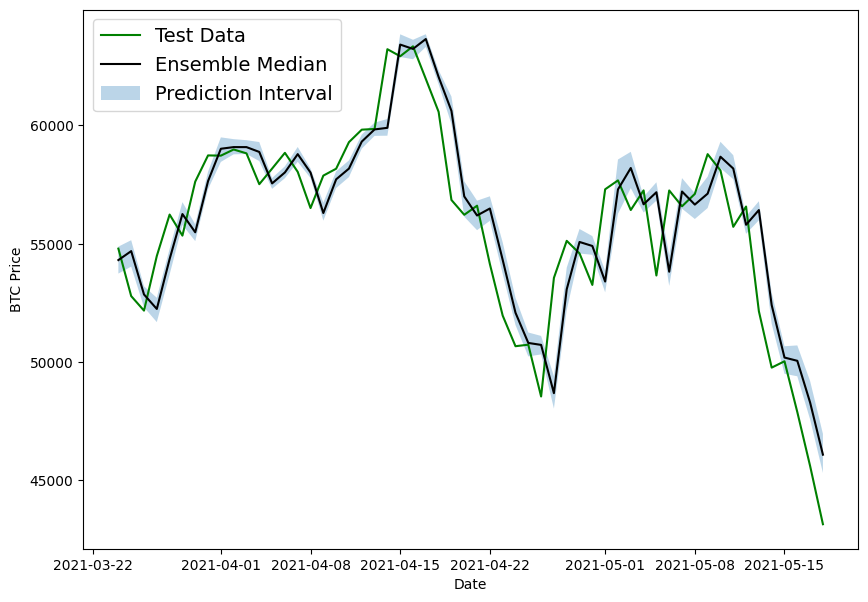

In [ ]:
# Get the median/mean values of our ensemble_preds
ensemble_mean = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset = 500
plt.figure(figsize = (10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label = "Test Data")
plt.plot(X_test.index[offset:], ensemble_mean[offset:], "k-", label = "Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")

# to plot the upper and lower bounds, let's use fill between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:], lower[offset:], upper[offset:], alpha = 0.3, label = "Prediction Interval")
plt.legend(loc="upper left", fontsize=14)
plt.show()

Hmm...

So far all our models predictions lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep.

> 🔑 **Note:** These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from normal distribution.

## ℹ️ Aside: 2 type of uncertainity (coconut and subway).

Uncertainity  estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (With perfect data, what's possible for a model to learn?)
2. What doesn't my  model know? (What can a model never predict? Or would it be helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right ornot?)

There are 2 major types of uncertainity in machine learning you should know about:
* **Aleatoric uncertainity** - this type of uncertainity cannot be reduced and it is often referred as "data" uncertainity or "subway" uncertainity
* **Epistemic uncertainity** - This type of uncertainity can be reduced, it's also referred to as "model" or coconut" uncertainity.


 A forecaster should be held responsible for both aleatory and epistemic uncertainty. i.e here  prediction intervals are also important as much as point forecast. mi
- https://towardsdatascience.com/why-you-should-care-about-the-nate-silver-vs-nassim-taleb-twitter-war-a581dce1f5fc
-https://www.youtube.com/watch?v=toTcf7tZK8c


## Model 9: Train a model on the full historical data to make predictions into the future

So far all our models have predicted on the test dataset, however, this is only pseduofuture.

Let's now build a model which is capable of predicting into the future.

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
# Train model on entire data to make predictions for the next day.
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis = 1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [ ]:
# Turn data into efficient running tensors.

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
#  You need to retrain your model everytime you want to generate a new prediction: article in :-
# https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name ="model_9_future_model")

# Compile model
model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# Fit model on all
model_9.fit(dataset_all,
            epochs = 100,
            verbose = 0,
            )

### Make predictions into future

In [ ]:
# How many timestep to predict into the future ?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the mdoel can only predict on the same kind of data it was trained on.

2. Creates an empty list for future forecasts (this will be returned at the end, when it's full of predictions) and extract the last `WINDOW_SIZE` values from the input values.

3. Loop `INTO_FUTURE`  times making a prediction ton `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction.

In [ ]:
# Note: we arenot retraining model with each new prediction: We are just making new prediction from old one. Retraining the model is better way but we can do it by myself later.

# 1. Create function to make predicitions into the future.
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns Future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # getting the last window size here [-7:]

  # 3. Make INTO_FUTURE number of predictions, altering  the data which gets predicted on each time.
  for _ in range(INTO_FUTURE):
    # Predict on the last window then appedn it again, again, again... (our model will eventually start to make forecast on it's own forecast).
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    #Append the prediction into future forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update the last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE window)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast


🛠 **Exercise**:
> In terms of a forecasting model, what might another approach to our make_future_forecasts() function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.

> So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.

> As it is, the make_future_forecasts() function skips the retraining of a model part.

In [ ]:
# Make forecast into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model= model_9,
                                        into_future = INTO_FUTURE,
                                        window_size = WINDOW_SIZE)

# look each prediction is appended for new future prediction. Later model start predicting on it's own data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55566.27734375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55566.27734375] -> Prediction: 51054.39453125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55566.27734375 51054.39453125] -> Prediction: 49337.34375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55566.27734375 51054.39453125 49337.34375   ] -> Prediction: 48180.875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55566.27734375
 51054.39453125 49337.34375    48180.875     ] -> Prediction: 47847.03125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
P

In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


### Plot future forecast

In [ ]:
future_forecast

[55566.277,
 51054.395,
 49337.344,
 48180.875,
 47847.03,
 44456.297,
 47317.125,
 54339.375,
 50258.047,
 48203.08,
 47554.543,
 47190.777,
 45159.133,
 49718.31]

In [ ]:
len(future_forecast)

14

In [ ]:
# last index date
bitcoin_prices_windowed.tail(1)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Return array of datetime values ranging from start_date to start_date + into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") #specify start dtae, "D" stands for day. offset =1 means future date will be 1 step onward to this date
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype = "datetime64[D]") # return a date range between start and end date

In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two week of timesteps (14 days)
next_time_steps = get_future_dates(start_date = last_timestep,
                                 into_future = INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

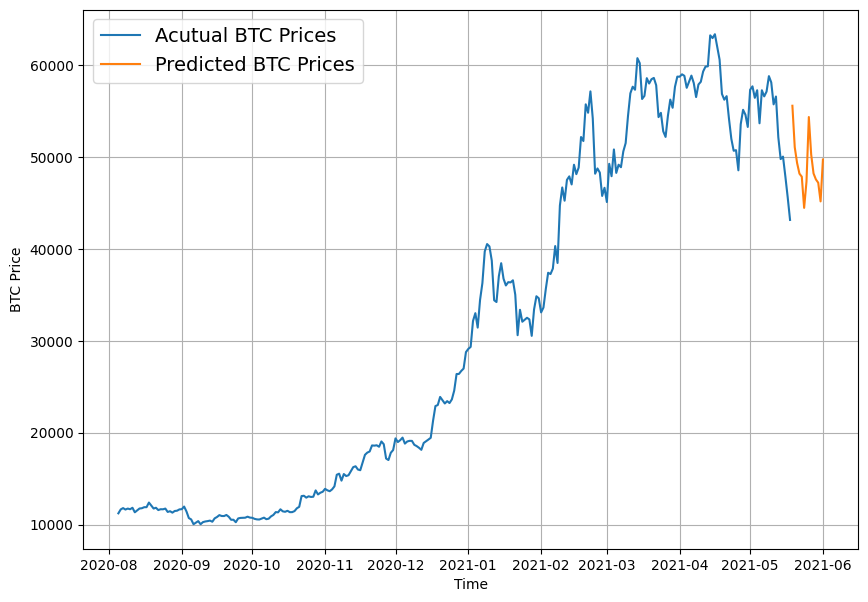

In [ ]:
# Plot the future prices predictions of Bitcoin
plt.figure(figsize = (10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-', label = "Acutual BTC Prices")
plot_time_series(next_time_steps, future_forecast, format='-', label = "Predicted BTC Prices")

`Look they arennot connected so we connect this plot`

In [ ]:
last_timestep

Timestamp('2021-05-18 00:00:00')

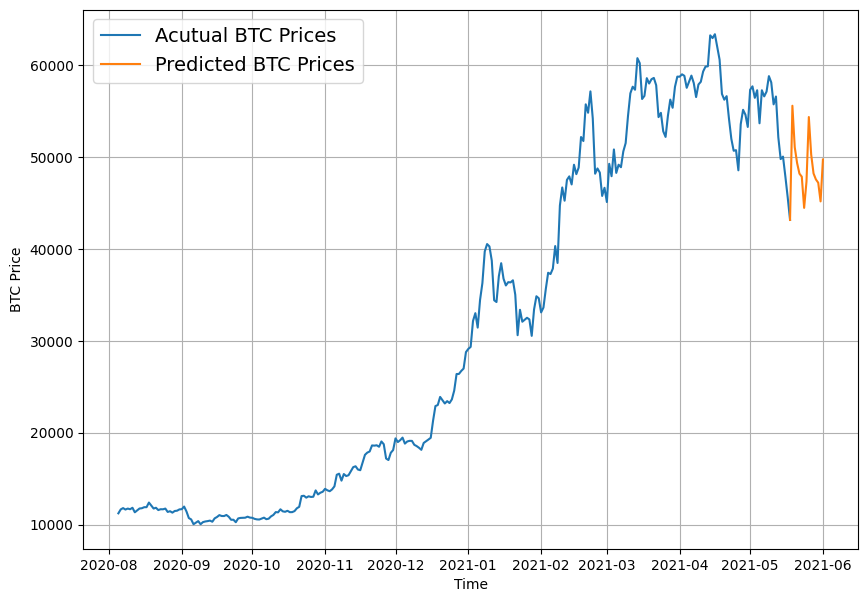

In [ ]:
# for connecting the plot for better looking plot
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep) # at index = 0. for timestep
future_forecast = np.insert(future_forecast, 0, btc_price[-1]) # for value

# Plot the future prices predictions of Bitcoin
plt.figure(figsize = (10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-', label = "Acutual BTC Prices")
plot_time_series(next_time_steps, future_forecast, format='-', label = "Predicted BTC Prices")

**Note**
> Look new prediction look like cyclic pattern like in sine or fourier series. Looks like we can't get good prediction without retraining the model on each new prediction.

> Or Our model may be overfitting the data. i.e Our bitcoin prices is almost unpredictable as it is a open system. This assumption is very true.

## Model 10: Why forecasting is BS (the turkey problem🦃)

> Turkey number increase is similar pace until thanksgiving where its number collapse. We don't have idea of thanksgiving it will be like disaster. So forecasting especially in open system when out of scope and highly unlikely but within the realm of possibility event can have massive impact, its impossible to really give real forecast.

> In open system this events are everywhere.

In [ ]:
# Let's introduce a Turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100  # changing very last day data by decrease its real value by 100 times. Artifical turkey problem injecting.

In [ ]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]


array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

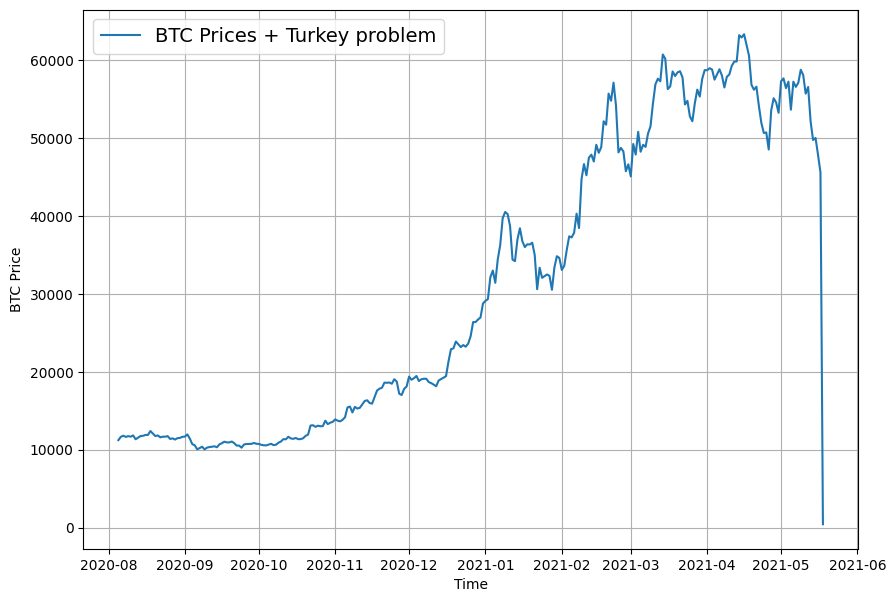

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = btc_timesteps_turkey,
                 values = btc_price_turkey, format='-',
                 label = "BTC Prices + Turkey problem",
                 start = 2500)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

Window indexs:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11]]), (2780, 8)) 


Window array:
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116, 125.27966],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966, 125.9275 ]]), (2780, 8)) 



Window :
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
     

(2224, 556, 2224, 556)

lets also replicate the model_1 but now with turkey data




### Build a turkey model (model to predict on turkey data)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model.name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
turkey_model.name

'Turkey_Model'

In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 299.2868 


663.1751708984375

In [ ]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("/content/model_experiment/Turkey_Model.keras")
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 290.1459


643.1719970703125

In [ ]:
# Make predictions with turkey mdoel
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8855.219, 8790.498, 9019.871, 8750.838, 8783.262, 8758.244,
       8656.406, 8527.27 , 8478.738, 8519.154], dtype=float32)>

In [ ]:
# How a single data point can mess up good performing results.
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 643.1719,
 'mse': 4881816.0,
 'rmse': 2209.4832,
 'mape': 21.51892,
 'mase': 26.513159}

In [ ]:
model_1_results

{'mae': 565.0378,
 'mse': 1158595.9,
 'rmse': 1076.381,
 'mape': 2.5235534,
 'mase': 0.99261487}

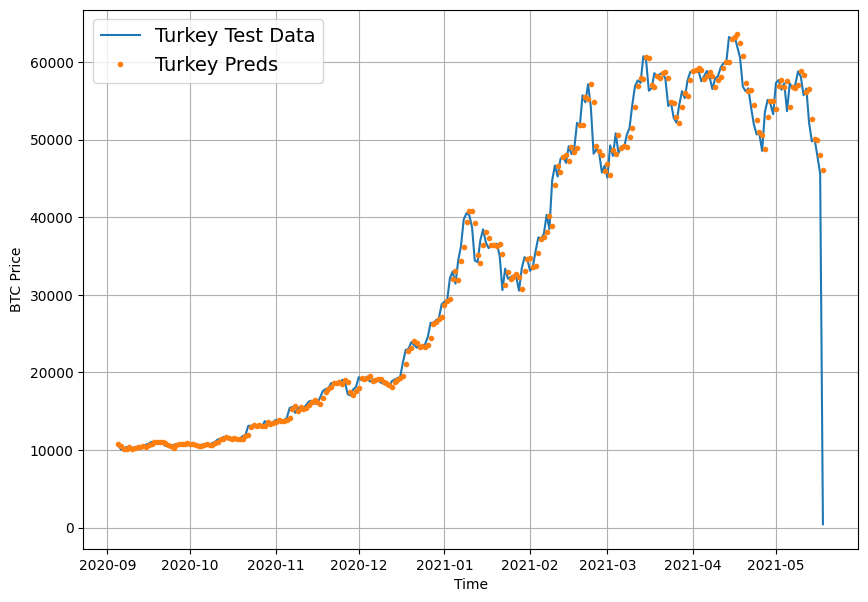

In [ ]:
plt.figure(figsize = (10,7))
offset = 300
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = btc_price_turkey[-len(X_test):],
                 format = "-",
                 label = "Turkey Test Data",
                 start = offset,)
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start = offset,)

**Insight**

> Look at final prediction it doesnot coincide with turkey data lat last. As we know turkey events are everywhere.

> Mased on historical data, model can not prepare for this sort of event.

> Model fail on  these event as it was trained on common distribution in history. Model cannot predict outside the distribution of data, it was trained on.

> Example: Look at any historical data on Oil prices.

> So, forecast is Bull shit.

## Compare the Models

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1147547.000,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,565.037781,1158595.875,1076.380981,2.523553,0.992615
model_2_dense_w30_h1,589.710571,1248584.500,1117.400757,2.696052,1.030820
model_3_dense_w30_h7,1256.884521,5440927.500,2332.579590,5.711878,2.236556
model_4_CONV1D,572.234192,1191186.625,1091.414917,2.576375,1.005257
model_5_LSTM,631.931580,1315620.250,1147.004883,2.855302,1.110129
model_6_multivariate,568.682007,1166567.625,1080.077637,2.552438,0.999017
model_8_NBEATs,571.848999,1163210.125,1078.522217,2.641453,1.004580
model_9_ensemble,568.728088,1146955.750,1070.960205,2.574343,0.999098
model_10_turkey,643.171875,4881816.000,2209.483154,21.518921,26.513159


<Axes: >

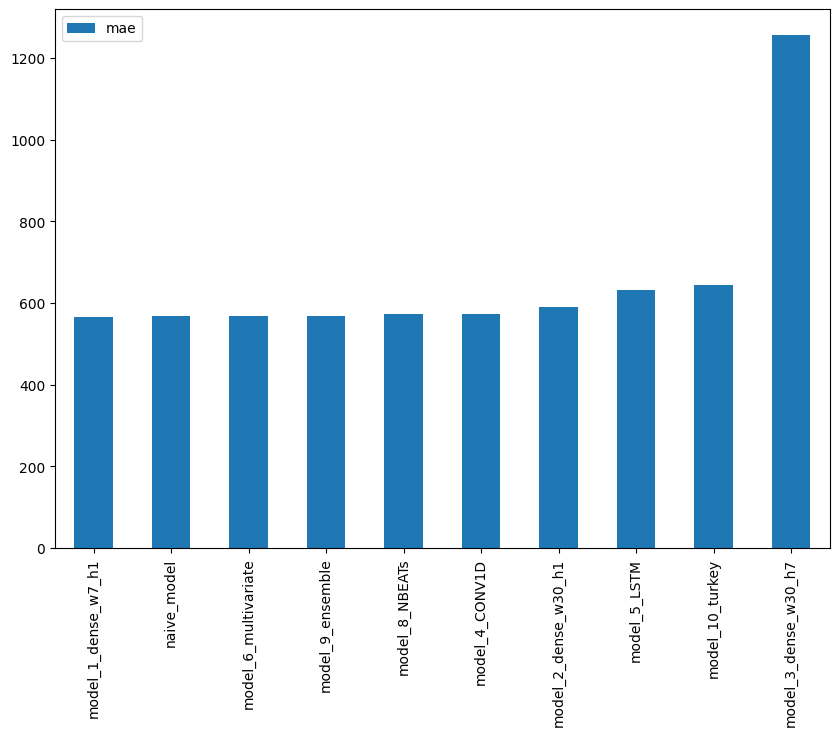

In [ ]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind = 'bar')

⚒️**Exercises**:
- Does scaling the data help for univariate/multivariate data? (e.g. getting all of the values between 0 & 1)
- Try doing this for a univariate model (e.g. model_1) and a multivariate model (e.g. model_6) and see if it effects model training or evaluation results.
- Get the most up to date data on Bitcoin, train a model & see how it goes (our data goes up to May 18 2021).
- You can download the Bitcoin historical data for free from coindesk.com/price/bitcoin and clicking "Export Data" -> "CSV".
- For most of our models we used WINDOW_SIZE=7, but is there a better window size?
- Setup a series of experiments to find whether or not there's a better window size.
- For example, you might train 10 different models with HORIZON=1 but with window sizes ranging from 2-12.
- Create a windowed dataset just like the ones we used for model_1 using tf.keras.preprocessing.timeseries_dataset_from_array() and retrain model_1 using the recreated dataset.
- For our multivariate modelling experiment, we added the Bitcoin block reward size as an extra feature to make our time series multivariate.
- Are there any other features you think you could add?
- If so, try it out, how do these affect the model?
- Make prediction intervals for future forecasts. To do so, one way would be to train an ensemble model on all of the data, make future forecasts with it and calculate the prediction intervals of the ensemble just like we did for model_8.
For future predictions, try to make a prediction, retrain a model on the predictions, make a prediction, retrain a model, make a prediction, retrain a model, make a prediction (retrain a model each time a new prediction is made). - Plot the results, how do they look compared to the future predictions where a model wasn't retrained for every forecast (model_9)?
-Throughout this notebook, we've only tried algorithms we've handcrafted ourselves. But it's worth seeing how a purpose built forecasting algorithm goes.
-Try out one of the extra algorithms listed in the modelling experiments part such as:
  -Facebook's Kats library - there are many models in here, remember the machine learning practioner's motto: experiment, experiment, experiment.
  -LinkedIn's Greykite library

📖**Extra-curriculum**

We've only really scratched the surface with time series forecasting and time series modelling in general. But the good news is, you've got plenty of hands-on coding experience with it already.

If you'd like to dig deeper in to the world of time series, I'd recommend the following:

-Forecasting: Principles and Practice is an outstanding online textbook which discusses at length many of the most important concepts in time series forecasting. I'd especially recommend reading at least Chapter 1 in full.
I'd definitely recommend at least checking out chapter 1 as well as the chapter on forecasting accuracy measures.
-🎥 Introduction to machine learning and time series by Markus Loning goes through different time series problems and how to approach them. It focuses on using the sktime library (Scikit-Learn for time series), though the principles are applicable elsewhere.
Why you should care about the Nate Silver vs. Nassim Taleb Twitter war by Isaac Faber is an outstanding discussion insight into the role of uncertainty in the example of election prediction.
-TensorFlow time series tutorial - A tutorial on using TensorFlow to forecast weather time series data with TensorFlow.
-📕 The Black Swan by Nassim Nicholas Taleb - Nassim Taleb was a pit trader (a trader who trades on their own behalf) for 25 years, this book compiles many of the lessons he learned from first-hand experience. It changed my whole perspective on our ability to predict.
-3 facts about time series forecasting that surprise experienced machine learning practitioners by Skander Hannachi, Ph.D - time series data is different to other kinds of data, if you've worked on other kinds of machine learning problems before, getting into time series might require some adjustments, Hannachi outlines 3 of the most common.
-🎥 World-class lectures by Jordan Kern, watching these will take you from 0 to 1 with time series problems:
  -Time Series Analysis - how to analyse time series data.
  -Time Series Modelling - different techniques for modelling time series data (many of which aren't deep learning).